# Data Analysis Project
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to December 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.

Link to dataset (Version 8) from https://www.kaggle.com/sobhanmoosavi/us-accidents/version/8

Motivation:
1. Are there changes in accidents between the first half of 2019 and of 2020? Are the number of accidents affected by Covid-19?
2. What factors affect the number/severity of an accident? Can severity be predicted?

---
## 1 Imports
### 1.1 Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample

import seaborn as sns

### 1.2 Data

In [3]:
file_path = './US_Accidents_Dec20.csv'

# If file exists
if os.path.isfile(file_path):
    data_ori = pd.read_csv(file_path)
else:
    print('Please download the dataset from the link provided above and'
          'place it in the project folder with the name "US_Accidents_Dec20.csv".')

---
## 2 Definitions

In [4]:
# All features in original data
column_list = [
    'ID',
    'Source',
    'TMC',
    'Severity',
    'Start_Time',
    'End_Time',
    'Start_Lat',
    'Start_Lng',
    'End_Lat',
    'End_Lng',
    'Distance(mi)',
    'Description',
    'Number',
    'Street',
    'Side',
    'City',
    'County',
    'State',
    'Zipcode',
    'Country',
    'Timezone',
    'Airport_Code',
    'Weather_Timestamp',
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Direction',
    'Wind_Speed(mph)',
    'Precipitation(in)',
    'Weather_Condition',
    'Amenity',
    'Bump',
    'Crossing',
    'Give_Way',
    'Junction',
    'No_Exit',
    'Railway',
    'Roundabout',
    'Station',
    'Stop',
    'Traffic_Calming',
    'Traffic_Signal',
    'Turning_Loop',
    'Sunrise_Sunset',
    'Civil_Twilight',
    'Nautical_Twilight',
    'Astronomical_Twilight'
]

# Defining all columns in original data with numeric values
numeric_columns = [
    'Severity',
    'Start_Lat',
    'Start_Lng',
    'End_Lat',
    'End_Lng',
    'Distance(mi)',
    'Number',
    'State',
    'Zipcode',
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)'
]

# Defining all columns in original data with boolean values
bool_columns = [
    'Amenity',
    'Bump',
    'Crossing',
    'Give_Way',
    'Junction',
    'No_Exit',
    'Railway',
    'Roundabout',
    'Station',
    'Stop',
    'Traffic_Calming',
    'Traffic_Signal',
]

# Defining wind values for value transformation (section 5.4.4)
wind_values = {
    'North': 'N',
    'South': 'S',
    'West': 'W',
    'East': 'E',
    'Calm': 'CALM',
    'Variable': 'VAR',
}

# Defining weather values for frequency encoding (section 7.1.4)
weather_values = {
    'Blowing': 'Blowing',
    'Windy': 'Windy',
    'Snow': 'Snow',
    'Drifting': 'Drifting',
    'Clear': 'Clear',
    'Cloudy': 'Cloudy',
    'Drizzle': 'Drizzle',
    'Fog': 'Fog',
    'Dust': 'Dust',
    'Whirls': 'Whirls',
    'Fair': 'Fair',
    'Freezing': 'Freezing',
    'Funnel Cloud': 'Funnel Cloud',
    'Rain': 'Rain',
    'Hail': 'Hail',
    'Haze': 'Haze',
    'Heavy': 'Heavy',
    'Light': 'Light',
    'Low': 'Light',  #
    'Mist': 'Mist',
    'Mostly Cloudy': 'Cloudy',
    'Overcast': 'Overcast',
    'Partial': 'Partial',
    'Partly': 'Partial',  #
    'Patches of Fog': 'Fog',  #
    'Sand': 'Sand',
    'Dusty': 'Dust',  #
    'Whirls Nearby': 'Whirlwinds',  #
    'Whirlwinds': 'Whirlwinds',
    'Ice': 'Ice Pellets',
    'Scattered Clouds': 'Cloudy',  #
    'Showers in the Vicinity': 'Rain',  #
    'Sleet': 'Sleet',
    'Small Hail': 'Hail',  #
    'Wintry Mix': 'Wintry Mix',
    'Thunder': 'Thunderstorm',  #
    'T-Storm': 'Thunderstorm',  #
    'Thunderstorm': 'Thunderstorm',
    'Thunderstorms': 'Thunderstorm',  #
    'Thunder in the Vicinity': 'Thunderstorm',  #
    'Tornado': 'Tornado',
    'Smoke': 'Smoke',
    'Shallow Fog': 'Fog',  #
    'Snow Grains': 'Snow Grains',
    'Squalls': 'Squalls',
    'Widespread Dust': 'Dust',  #
    'Volcanic Ash': 'Volcanic Ash',
    'None': 'None',
    'N/A Precipitation': 'None',  #
}

---
## 3 Data Overview

In [5]:
# Shape of data
data_ori.shape

(4232541, 49)

In [6]:
# Types
data_ori.dtypes


ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [7]:
# Features
list(data_ori)

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [8]:
# Head
data_ori.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [9]:
# Descriptions
data_ori.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


---
## 4 Data Cleaning

### 4.1 Drop columns
Dropping irrelevant columns.

Reasons:

- End_Lat, End_Lng - Shows end position of car crash. Full of NaNs.

- Country - Since it is all happening in the US, this is an insignificant column.

- ID - ID of each crash. Unnecessary for modelling reasons.

- Source - API source of where the data comes from. This has no relationship to accident type/severity.

- Description - contains unstructured text data (with typos) which contains information such as address/ zipcode which
are already present in the data set. Other information in this column such as exact names, details of those involved
etc. are unimportant for our current project.

- Number, Precipitation - too many NaN values, others mostly 0. Weather data already included in another column.

- Turning_Loop - all values are 'False'. Will not make any change to model.

- Timezone - our analysis will be based on local time. Timezone does not have any effect on accidents.

- Airport_Code - Location of accident already included in data set. Airport code unimportant.

- Weather_Timestamp - shows us exact time of weather measurement which all match day of accident.

- Wind_Chill(F) - We already have weather data. Wind chill is calculated using temperature and wind speed which we
already have in dataset. Affect of wind on skin is unimportant for accident rates.

- End_Time - End time in this dataset is just Start_time + 6 hours. Doesn't have any significant meaning.

- Sunrise_Sunset, Civil_Twilight, Astronomical_Twilight - all mean similar things, we dont want to put extra weight on day/night
differentiation. Nautical Twilight is the point at which artificial light is recommended so we chose that as our indicator of Day/Night

In [9]:
columns_to_drop = [
    'End_Lat',
    'End_Lng',
    'Country',
    'ID',
    'Source',
    'Description',
    'Number',
    'Precipitation(in)',
    'Turning_Loop',
    'Timezone',
    'Airport_Code',
    'Weather_Timestamp',
    'Wind_Chill(F)',
    'End_Time',
    'Sunrise_Sunset',
    'Civil_Twilight',
    'Astronomical_Twilight'

]

data_ori.drop(columns=columns_to_drop, inplace=True)  # inplace -> no need to store result in new variable

### 4.2 Drop missing values

Checking for nan values in each column

In [10]:
# Assumption: no TMC value means it is not a severe accident (not severe enough to be noted)
# Therefore, replacing the NaN values in TMC column with 0
data_ori['TMC'].replace(np.NAN, 0, inplace=True)
data_ori['TMC'].value_counts()

201.0    2264385
0.0      1516064
241.0     284371
245.0      51670
229.0      23171
203.0      18536
222.0      13611
244.0      13101
406.0      12815
246.0       9019
343.0       8073
202.0       6483
247.0       4806
236.0       2123
206.0       1370
248.0       1025
339.0       1020
341.0        674
336.0         98
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

In [11]:
# Checking for number of nan values in columns
new_col_list = []  # 39 cols
for col in column_list:
    if col not in columns_to_drop:
        new_col_list.append(col)

for col in new_col_list:
    nan_sum = data_ori[col].isnull().sum()
    if nan_sum:
        print(col, nan_sum)

City 137
Zipcode 1292
Temperature(F) 89900
Humidity(%) 95467
Pressure(in) 76384
Visibility(mi) 98668
Wind_Direction 83611
Wind_Speed(mph) 479326
Weather_Condition 98383
Nautical_Twilight 141


13 columns contain nan values:

- City: 137
- Zipcode 1292
- Temperature(F) 89900
- Humidity(%) 95467
- Pressure(in) 76384
- Visibility(mi) 98668
- Wind_Direction 83611
- Wind_Speed(mph) 479326
- Weather_Condition 98383
- Nautical_Twilight 141

In [12]:
# Deleting nan rows

# Deleting 141 total rows - City, Nautical_Twilight
print(len(data_ori))  # 4232541

data_ori.dropna(subset=["City", 'Nautical_Twilight'], inplace=True)

# Deleting remaining rows since it is only a small percentage of the entire dataset
data_ori.dropna(
    subset=['City', 'Zipcode', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
            'Wind_Speed(mph)', 'Weather_Condition'], inplace=True)

print(len(data_ori))  # 3713887

4232541
3713887


-> about 12% data removed (all NaNs)

### 5.3 Drop incorrect values

Some values recorded in this dataset are clearly incorrect. We choose to not include them in future calculations.

These include:
1. Temperature(F) - contains extreme values of temperature outside the range of recorded temperature values in the US
from 2016 - 2020
2. Wind_Speed(mph) - contains extreme values of wind speed outside the range of recorded speed values in the US
from 2016 - 2020. Assuming vehicles involved in the accident were not literally inside a tornado/hurricane

In [13]:
# Extreme Temperature -> 5 rows dropped
data_ori.drop(data_ori[(data_ori['Temperature(F)'] >= 168.8) | (data_ori['Temperature(F)'] <= -77.8)].index,
              inplace=True)
print(len(data_ori))

# Extreme Wind_Speed -> 13 rows dropped
data_ori.drop(data_ori[data_ori['Wind_Speed(mph)'] >= 471.8].index, inplace=True)
print(len(data_ori))

3713882
3713869


### 4.3 Value Transformation

#### 4.3.1 Zip Code

Formatting all zipcodes in dataset to contain 5 digits only - basic US zipcode format. The extended ZIP+4 code present
in a few of the rows is not necessary for our analysis.

In [14]:
# Taking first 5 digits of zip code -> save it in Zipcode again
data_ori['Zipcode'] = data_ori['Zipcode'].str[:5]

#### 4.3.2 Unit conversion to SI units

Convert from US to SI units and create a new column for each

In [15]:
# Distance miles -> kilometres
data_ori['Distance(km)'] = data_ori['Distance(mi)'] * 1.609

# Temperature F -> C
data_ori['Temperature(C)'] = (data_ori['Temperature(F)'] - 32) / 1.8

# Wind_Speed mi/h -> km/h
data_ori['Wind_Speed(kmh)'] = data_ori['Wind_Speed(mph)'] * 1.609

# Visibility mi -> km
data_ori['Visibility(km)'] = data_ori['Visibility(mi)'] * 1.609

# Pressure Pa -> in
data_ori['Pressure(Pa)'] = data_ori['Pressure(in)'] / 29.92

# Dropping previous columns with american units
columns_to_drop = [
    'Distance(mi)',
    'Temperature(F)',
    'Wind_Speed(mph)',
    'Visibility(mi)',
    'Pressure(in)'
]

data_ori.drop(columns=columns_to_drop, inplace=True)

#### 4.3.3 Timestamp transformation

In [16]:
# Converting from string type to datetime
data_ori['Start_Time'] = pd.to_datetime(data_ori['Start_Time'])

# Creating columns for Section 6 analysis.
data_ori['Year'] = data_ori['Start_Time'].dt.year
data_ori['Month'] = data_ori['Start_Time'].dt.month
data_ori['Week'] = data_ori['Start_Time'].dt.week
data_ori['Weekday'] = data_ori['Start_Time'].dt.dayofweek  # Monday = 0
data_ori['Hour'] = data_ori['Start_Time'].dt.hour

/Users/irene/opt/anaconda3/envs/intro_to_danalytics_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


#### 4.3.4 Wind direction transformation
Converting overlapping values. For example: 'S' & 'South' mean the same thing so 'South' will be transformed to 'S'.
Transformations based on wind_values dict.

In [17]:
data_ori["Wind_Direction"].replace(wind_values, inplace=True)

---
## 5 Exploratory Data Analysis

In [18]:
# Copy original dataset and work with the new data_prep
data_prep = data_ori.copy(deep=True)

### 5.1 Univariate Non-Graphical

In [20]:
# Display all value counts
for column in data_prep:  # list of columns
    print(data_prep[column].value_counts().sort_index(), "\n")

0.0      1370974
200.0         49
201.0    1952038
202.0       5277
203.0      15395
206.0       1162
222.0      11863
229.0      18822
236.0       1703
239.0         40
241.0     247208
244.0      10955
245.0      45648
246.0       8044
247.0       3967
248.0        927
336.0         81
339.0        885
341.0        594
343.0       7236
351.0          4
406.0      10997
Name: TMC, dtype: int64 

1      28539
2    2662225
3     918089
4     105016
Name: Severity, dtype: int64 

2016-02-08 00:37:08    1
2016-02-08 06:49:27    1
2016-02-08 07:23:34    1
2016-02-08 07:39:07    1
2016-02-08 07:44:26    1
2016-02-08 07:53:43    1
2016-02-08 07:59:35    1
2016-02-08 07:59:58    1
2016-02-08 08:00:40    1
2016-02-08 08:10:04    1
2016-02-08 08:14:42    1
2016-02-08 08:15:41    1
2016-02-08 08:16:57    2
2016-02-08 08:21:27    1
2016-02-08 08:36:34    1
2016-02-08 08:37:07    1
2016-02-08 08:39:43    1
2016-02-08 08:43:20    1
2016-02-08 08:53:17    1
2016-02-08 09:24:37    1
2016-02-08 09:25:

In [21]:
# Display data types
data_prep.dtypes

TMC                         float64
Severity                      int64
Start_Time           datetime64[ns]
Start_Lat                   float64
Start_Lng                   float64
Street                       object
Side                         object
City                         object
County                       object
State                        object
Zipcode                      object
Humidity(%)                 float64
Wind_Direction               object
Weather_Condition            object
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                       bool
No_Exit                        bool
Railway                        bool
Roundabout                     bool
Station                        bool
Stop                           bool
Traffic_Calming                bool
Traffic_Signal                 bool
Nautical_Twilight            object
Distance(km)                

In [22]:
# Describe numerical columns
data_prep.describe()

,TMC,Severity,Start_Lat,Start_Lng,Humidity(%),Distance(km),Temperature(C),Wind_Speed(kmh),Visibility(km),Pressure(Pa),Year,Month,Week,Weekday,Hour
count,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06,3.713869e+06
mean,1.314682e+02,2.296075e+00,3.640524e+01,-9.525949e+01,6.493743e+01,5.423457e-01,1.657593e+01,1.271528e+01,1.470839e+01,9.912020e-01,2.018557e+03,7.207676e+00,2.965761e+01,2.470872e+00,1.229454e+01
std,1.019809e+02,5.294684e-01,5.024849e+00,1.720517e+01,2.264344e+01,2.555027e+00,1.032084e+01,8.245473e+00,4.421269e+00,2.975404e-02,1.318122e+00,3.551935e+00,1.553943e+01,1.755461e+00,5.423586e+00
min,0.000000e+00,1.000000e+00,2.455527e+01,-1.246238e+02,1.000000e+00,0.000000e+00,-3.388889e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00,3.346929e+01,-1.172514e+02,4.900000e+01,0.000000e+00,1.000000e+01,7.401400e+00,1.609000e+01,9.879679e-01,2.018000e+03,4.000000e+00,1.600000e+01,1.000000e+00,8.000000e+00
50%,2.010000e+02,2.000000e+00,3.585015e+01,-8.953074e+01,6.700000e+01,0.000000e+00,1.777778e+01,1.126300e+01,1.609000e+01,9.996658e-01,2.019000e+03,8.000000e+00,3.200000e+01,2.000000e+00,1.300000e+01
75%,2.010000e+02,3.000000e+00,4.030447e+01,-8.087302e+01,8.400000e+01,1.496370e-01,2.438889e+01,1.673360e+01,1.609000e+01,1.004679e+00,2.020000e+03,1.000000e+01,4.400000e+01,4.000000e+00,1.700000e+01
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,1.000000e+02,7.107758e+02,7.500000e+01,5.277520e+02,1.785990e+02,1.939840e+00,2.020000e+03,1.200000e+01,5.300000e+01,6.000000e+00,2.300000e+01


### 5.2 Univariate Graphical

Histogram of accidents of the biggest cities

Text(0.5, 1.0, 'The 20 US-Cities with most accidents.')

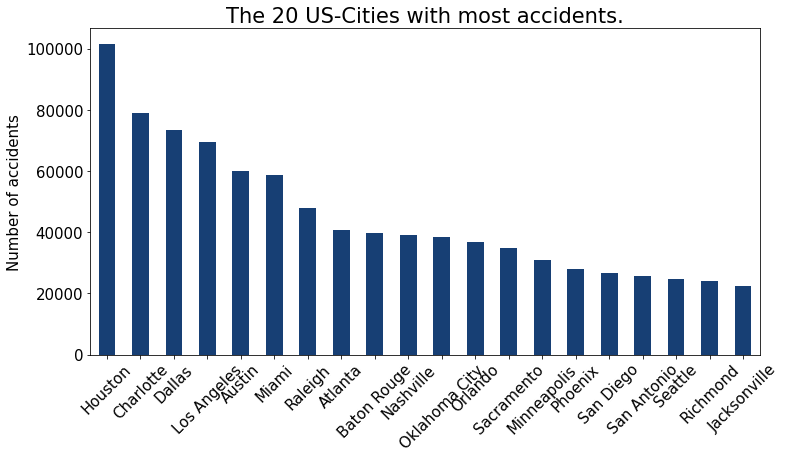

In [91]:
data_prep.City.value_counts()[:20].plot(kind='bar', figsize=(12, 6), color="#173F74")
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title("The 20 US-Cities with most accidents.", fontsize=21)

Histogram of number of accidents over month grouped by severity

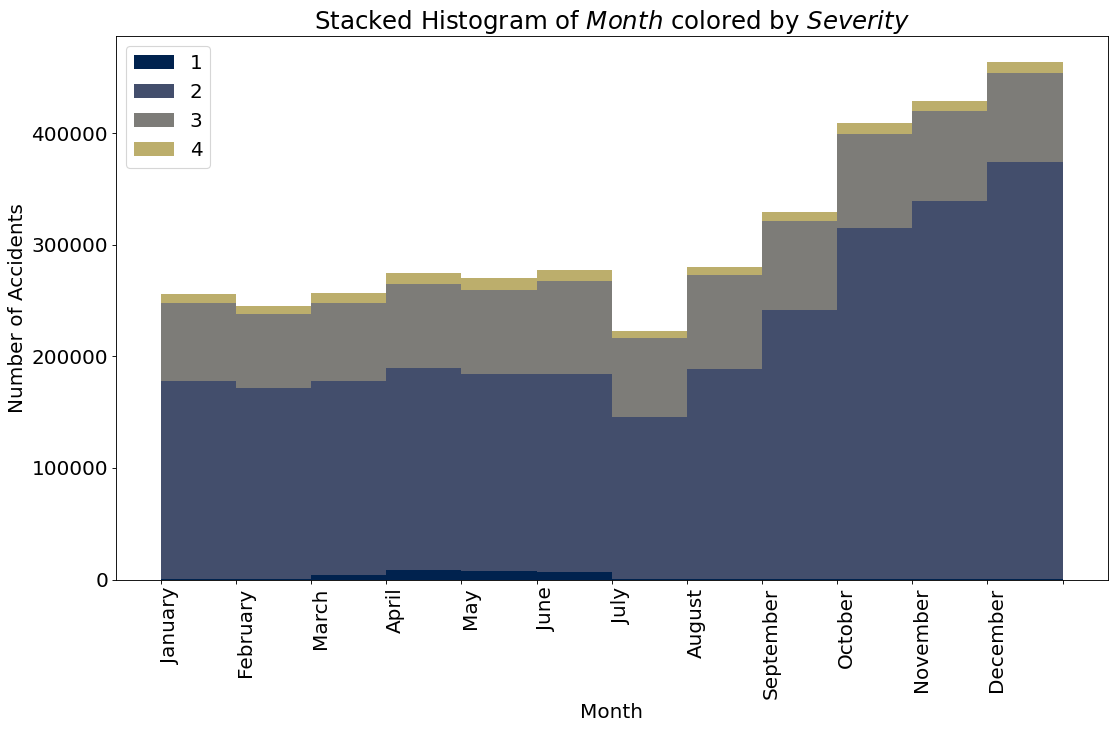

In [92]:
# Prepare data
x_var = 'Month'
groupby_var = 'Severity'
df_agg = data_prep.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep[x_var].values.tolist() for i, data_prep in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend({group: col for group, col in zip(np.unique(data_prep[groupby_var]).tolist(), colors[:len(vals)])},
           fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
# plt.ylim(0, 40)
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
              'November', 'December', None]
plt.xticks(bins, month_list, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Histogram of number of accidents over states grouped by severity

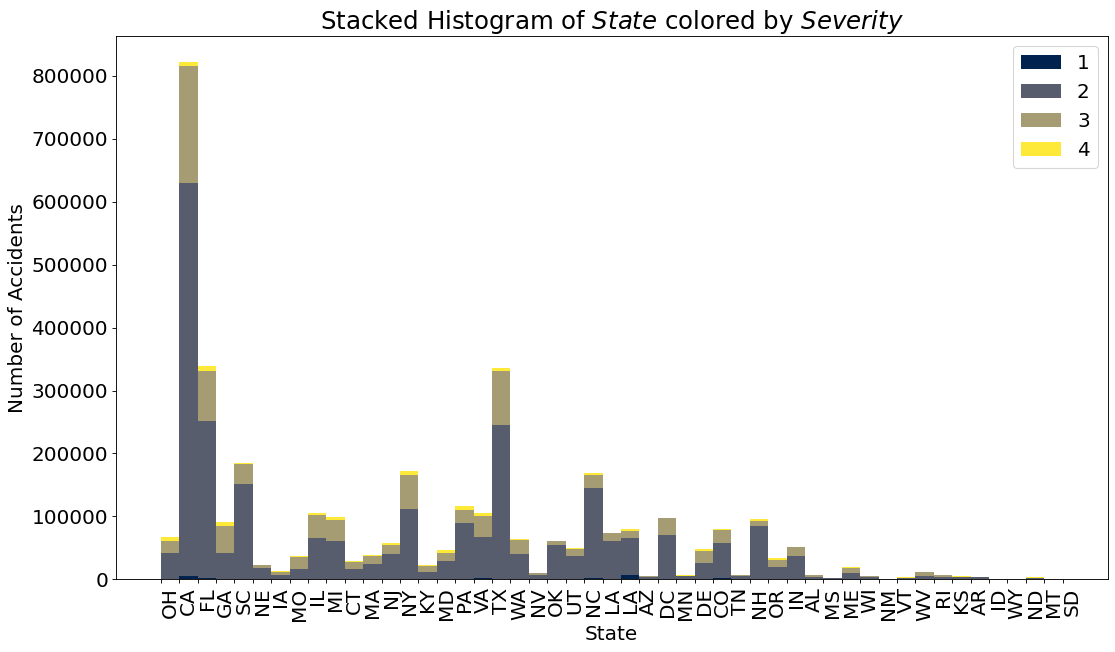

In [93]:
# Prepare data
x_var = 'State'
groupby_var = 'Severity'
# data_prep.sort_values(by=[x_var])
df_agg = data_prep.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep[x_var].values.tolist() for i, data_prep in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend({group: col for group, col in zip(np.unique(data_prep[groupby_var]).tolist(), colors[:len(vals)])},
           fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
plt.xticks(bins, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Histogram of number of accidents over hours grouped by severity

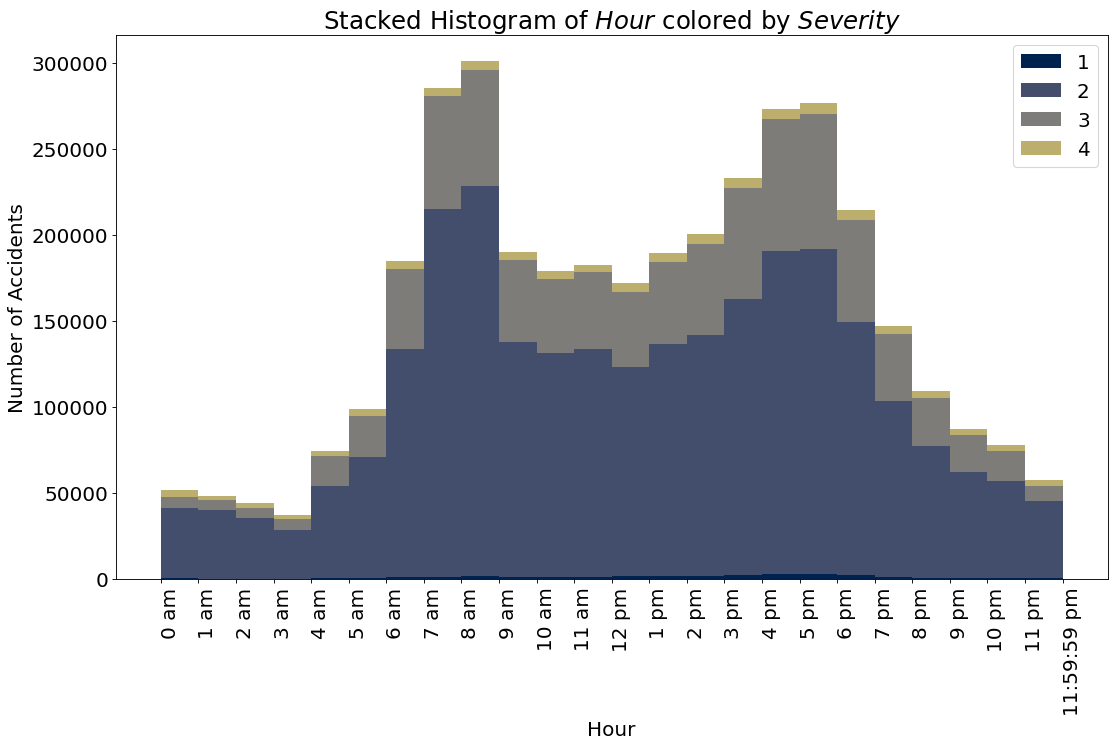

In [94]:
# Prepare data
x_var = 'Hour'
groupby_var = 'Severity'
df_agg = data_prep.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep[x_var].values.tolist() for i, data_prep in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend({group: col for group, col in zip(np.unique(data_prep[groupby_var]).tolist(), colors[:len(vals)])},
           fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
hour_list = ['0 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
             '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm',
             '11:59:59 pm']
plt.xticks(bins, hour_list, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Histogram of number of accidents over weekday grouped by severity

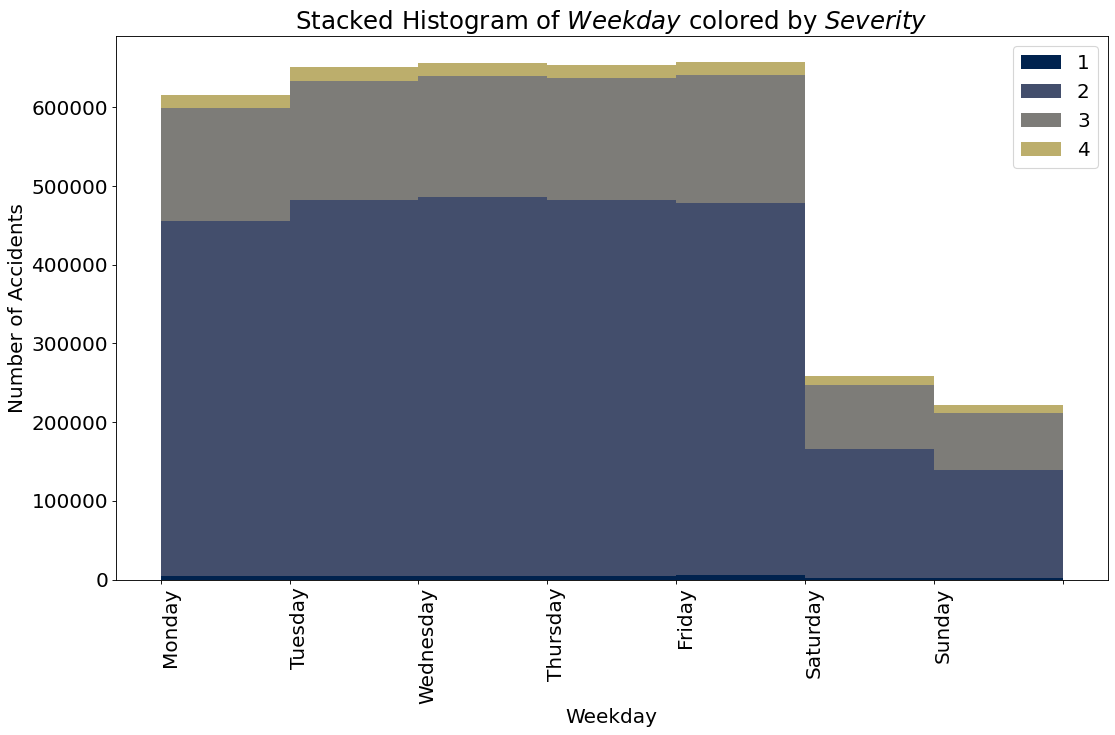

In [95]:
# Prepare data
x_var = 'Weekday'
groupby_var = 'Severity'
df_agg = data_prep.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep[x_var].values.tolist() for i, data_prep in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend({group: col for group, col in zip(np.unique(data_prep[groupby_var]).tolist(), colors[:len(vals)])},
           fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
weekday_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", None]
plt.xticks(bins, weekday_list, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Histogram of accidents according to the weather condition

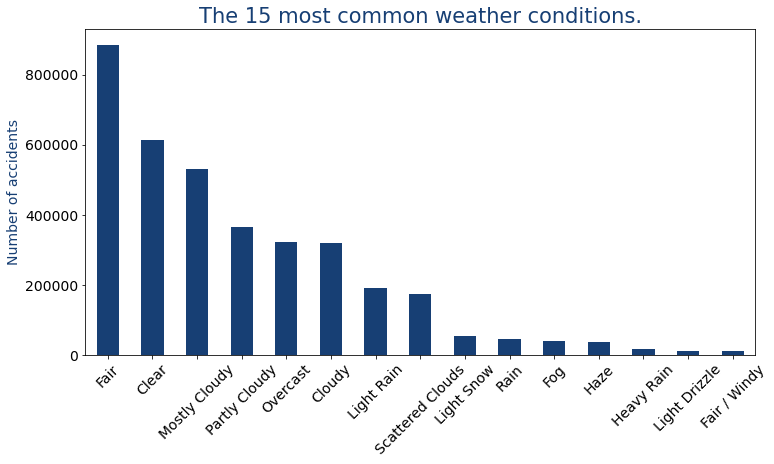

In [97]:
data_prep.Weather_Condition.value_counts()[:15].plot(kind='bar', figsize=(12, 6), color="#173F74")
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of accidents', color="#173F74", fontsize=14)
plt.title("The 15 most common weather conditions.", color="#173F74", fontsize=21)
plt.show()

ggplot with the development of accidents over time grouped by severity

/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


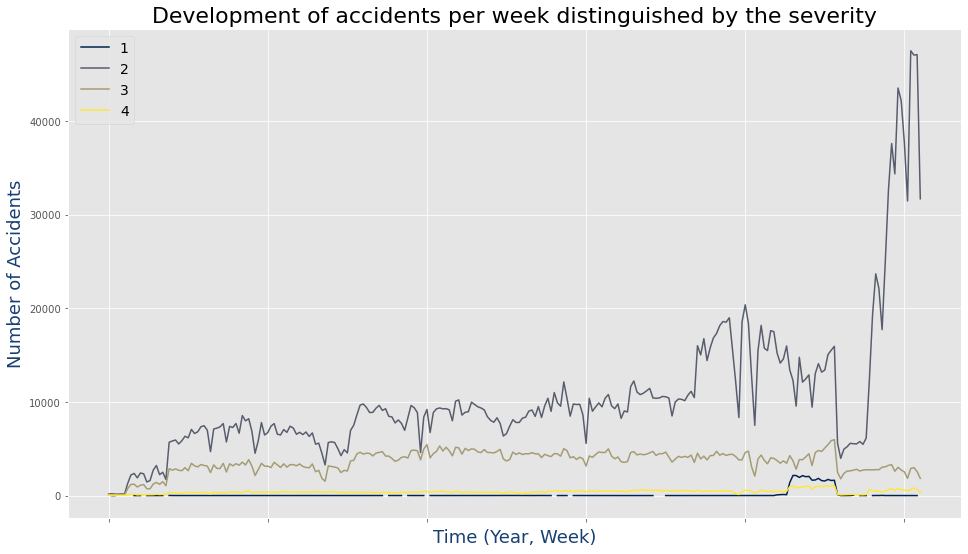

In [99]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16, 9))
data_prep.groupby(['Year', 'Week', 'Severity']).count()["City"].unstack().plot(ax=ax, cmap="cividis")
ax.set_xlabel('Time (Year, Week)', color="#173F74", fontsize=18)
ax.set_ylabel('Number of Accidents', color="#173F74", fontsize=18)

ax.set_title("Development of accidents per week distinguished by the severity", fontsize=22)
ax.legend(fontsize=14)

# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[1] = 'Testing'
# ax.set_xticklabels(labels)
# start, end = (2016, 1), (2020, 52)
# ax.xaxis.set_ticks(np.arange(start, end, 26))
# ax.set_xticklabels(["2016 H1", "2016 H2","2017 H1", "2017 H2","2018 H1", "2018 H2","2019 H1", "2019 H2","2020 H1", "2020 H2", "2021"])
plt.show()

Graph of number of accidents per state to show backlog

/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


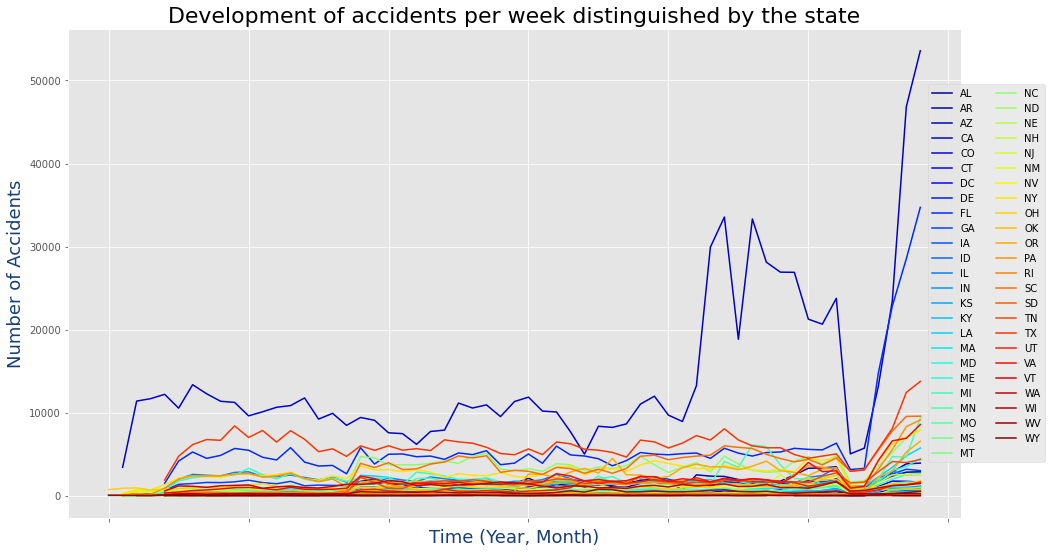

In [100]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16, 9))
data_prep.groupby(['Year', 'Month', 'State']).count()['City'].unstack().plot(ax=ax, cmap="jet")  #
ax.set_xlabel('Time (Year, Month)', color="#173F74", fontsize=18)
ax.set_ylabel('Number of Accidents', color="#173F74", fontsize=18)
ax.set_title("Development of accidents per week distinguished by the state", fontsize=22)
ax.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=2)
plt.show()

Plot of accidents according to time of day

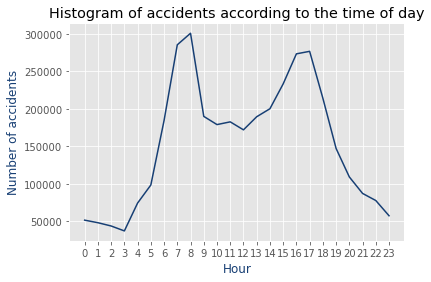

In [102]:
hours = [hour for hour, df in data_prep.groupby('Hour')]
plt.plot(hours, data_prep.groupby(['Hour'])['City'].count(), color="#173F74")
plt.xticks(hours)
plt.xlabel('Hour', color="#173F74")
plt.ylabel('Number of accidents', color="#173F74")
plt.title("Histogram of accidents according to the time of day")
plt.show()

Plot of accidents according to day of the week

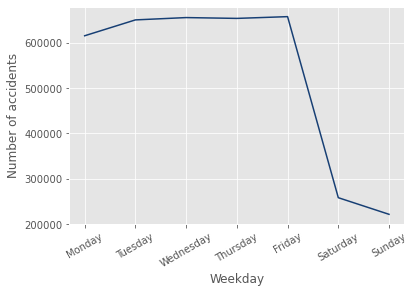

In [103]:
days = [day for day, df in data_prep.groupby('Weekday')]
plt.plot(days, data_prep.groupby(['Weekday'])['City'].count(), color="#173F74")
plt.xticks(days, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=30)
plt.xlabel('Weekday')
plt.ylabel('Number of accidents')
plt.show()

Histogram of accidents ordered by state

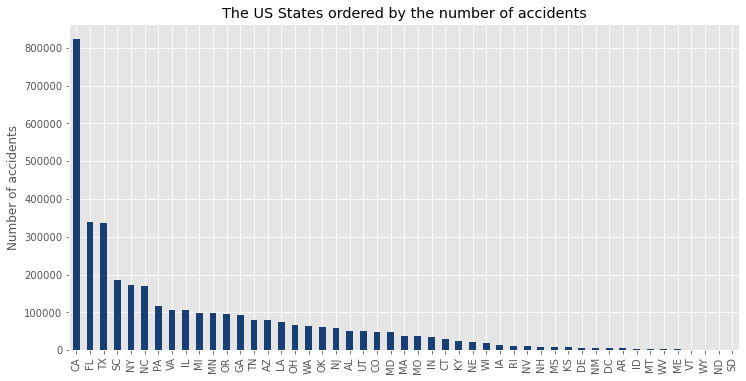

In [104]:
plt.title("The US States ordered by the number of accidents")
plt.xticks(rotation=30)
plt.ylabel('Number of accidents')
data_prep.State.value_counts().plot(kind='bar', figsize=(12, 6), color="#173F74")
plt.show()

Pie chart of severity

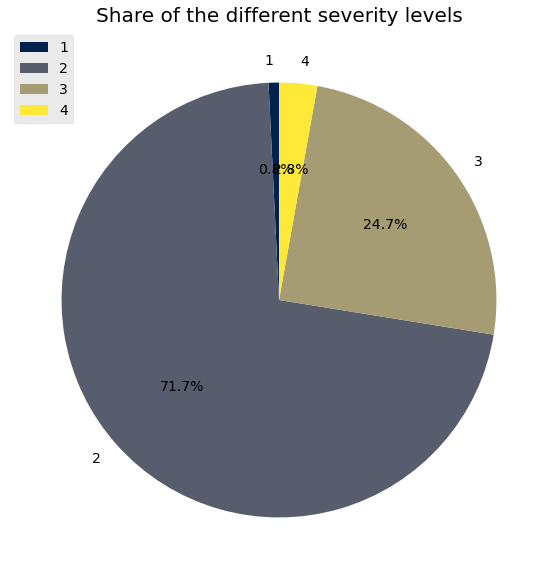

In [105]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
cmap = plt.cm.cividis
colors = cmap(np.linspace(0., 1., 4))
sizes = data_prep['Severity'].value_counts().sort_index() / data_prep['Severity'].value_counts().sum() * 100
ax.pie(sizes, labels=sizes.index,
       autopct='%1.1f%%', shadow=False, startangle=90, colors=colors, textprops={'fontsize': 14})
# data_prep.Severity.value_counts().plot.pie(cmap="cividis")
ax.set_title("Share of the different severity levels", fontsize=20)
ax.legend(fontsize=14)
plt.show()

### 5.3 Multivariate Non-Graphical

In [ ]:
# correlation matrix
data_prep.corr()

### 5.4 Multivariate Graphical

Correlogram

Text(0.5, 1.0, 'Correlogram of all features')

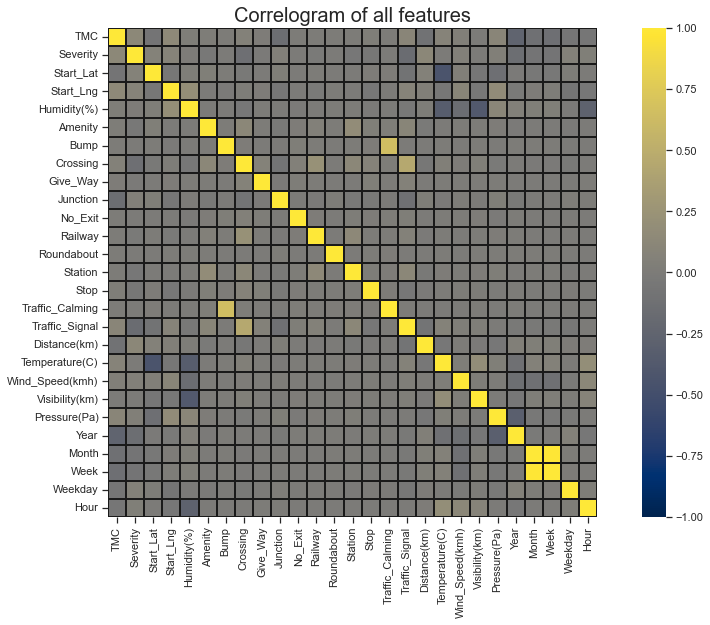

In [109]:
fig = plt.gcf()
fig.set_size_inches(16, 9)
fig = sns.heatmap(data_prep.corr(), annot=False, linewidths=1, linecolor='k', square=True, mask=False,
                  vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True, cmap="cividis")
sns.set(style='ticks')
plt.title("Correlogram of all features", fontsize=20)

US map simple: scatterplot based on latitude and longitude data grouped by severity

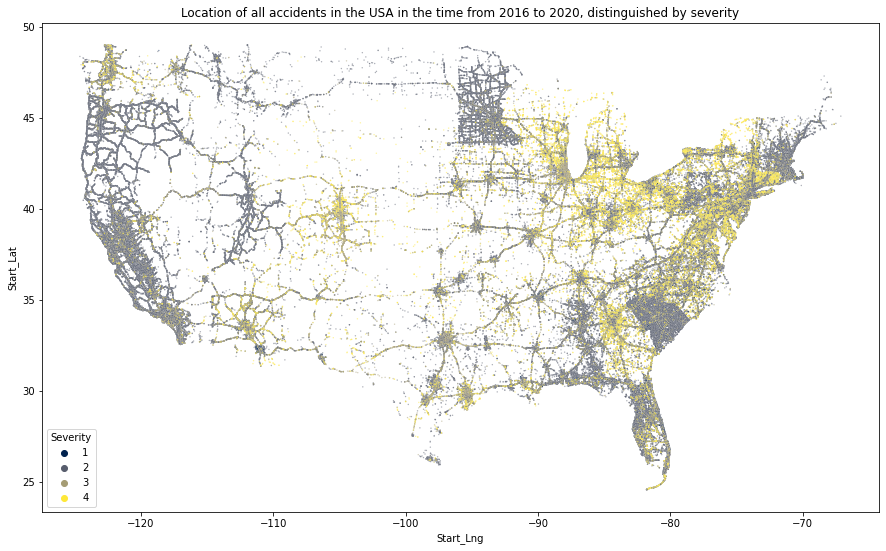

In [19]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x="Start_Lng", y="Start_Lat", data=data_prep, hue="Severity", legend="auto",
                s=2, palette="cividis", alpha=0.5)
plt.title("Location of all accidents in the USA in the time from 2016 to 2020, distinguished by severity")
plt.show()

US map complex: scatterplot based on latitude and longitude data grouped by state

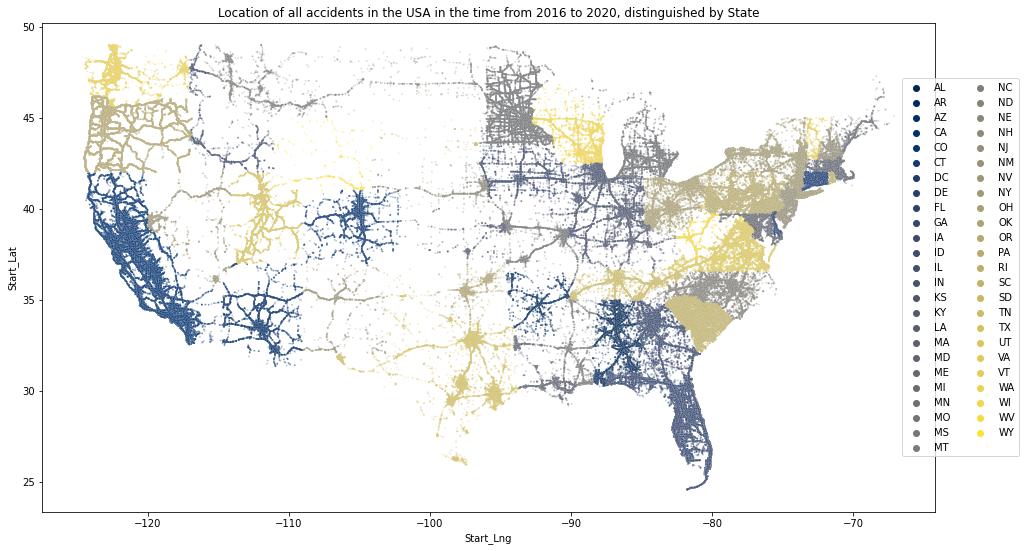

In [21]:
state_list = data_prep["State"].unique()
sorted_state_list = sorted(state_list)
plt.figure(figsize=(16, 9))
g = sns.scatterplot(x="Start_Lng", y="Start_Lat", data=data_prep, hue="State", hue_order=sorted_state_list,
                    legend="auto", s=3, palette="cividis", alpha=0.3)
g.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=2)
plt.title("Location of all accidents in the USA in the time from 2016 to 2020, distinguished by State")
plt.show()



### 5.5 Comparison of 2019 with 2020
#### 5.5.1 Preparation Part 1

In [22]:
data_prep_wo_bias = data_prep.copy(deep=True)

# dropping states which cause huge bias
data_prep_wo_bias = data_prep_wo_bias[data_prep_wo_bias['State'] != 'CA']
data_prep_wo_bias = data_prep_wo_bias[data_prep_wo_bias['State'] != 'FL']


#### 5.5.2 Graphical analysis

Graph of number of accidents per state to show backlog. A result of a huge number of accidents being logged after their 'true dates'.

/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


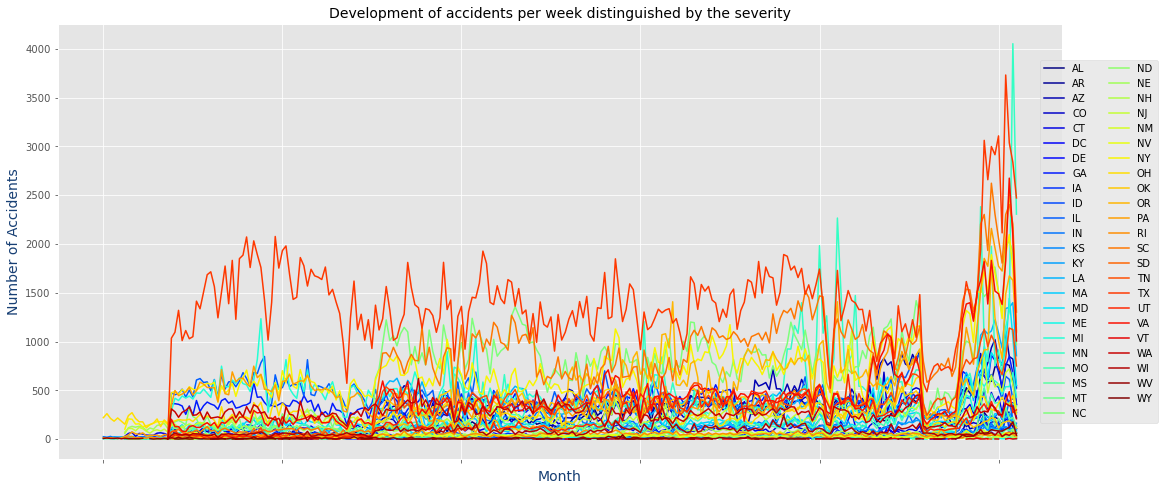

In [65]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 8))
data_prep_wo_bias.groupby(['Year', 'Week', 'State']).count()['City'].unstack().plot(ax=ax, cmap="jet")  #
ax.set_xlabel('Month', color="#173F74", fontsize=14)
ax.set_ylabel('Number of Accidents', color="#173F74", fontsize=14)
ax.set_title("Development of accidents per week distinguished by the severity", fontsize=14)
ax.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=2)
plt.show()

Graph of number of accidents of severity 1 to show that it mainly depends on a short time period

/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


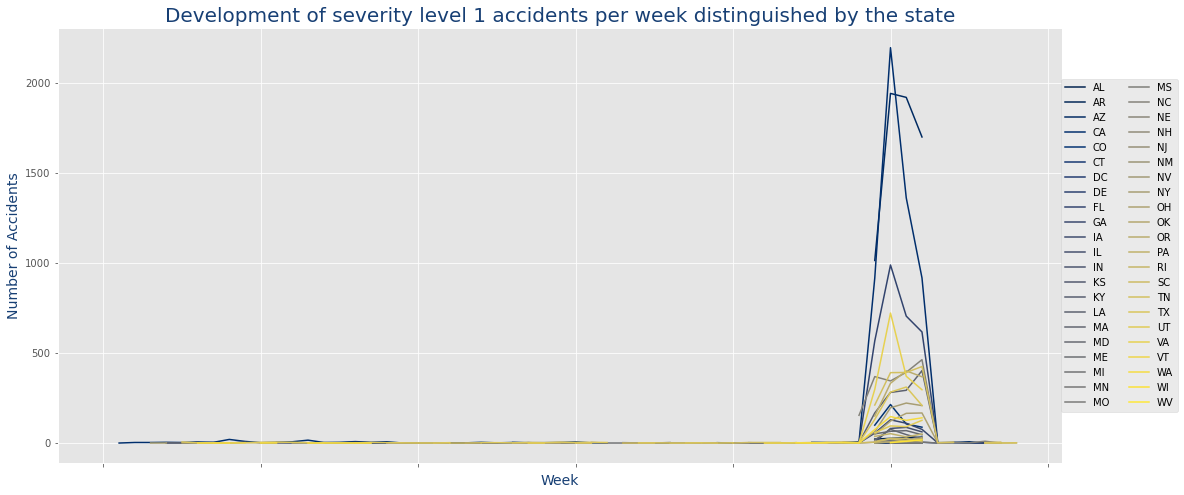

In [66]:
data_prep_sev_1 = data_prep[data_prep.Severity == 1]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 8))
data_prep_sev_1.groupby(['Year', 'Month', 'State']).count()['City'].unstack().plot(ax=ax, cmap="cividis")

ax.set_xlabel('Week', color="#173F74", fontsize=14)
ax.set_ylabel('Number of Accidents', color="#173F74", fontsize=14)
ax.set_title("Development of severity level 1 accidents per week distinguished by the state", fontsize=20,
             color="#173F74")
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.5), ncol=2)
plt.show()

Graph of number of accidents of severity 1 to show that it mainly depends on a short time period

/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


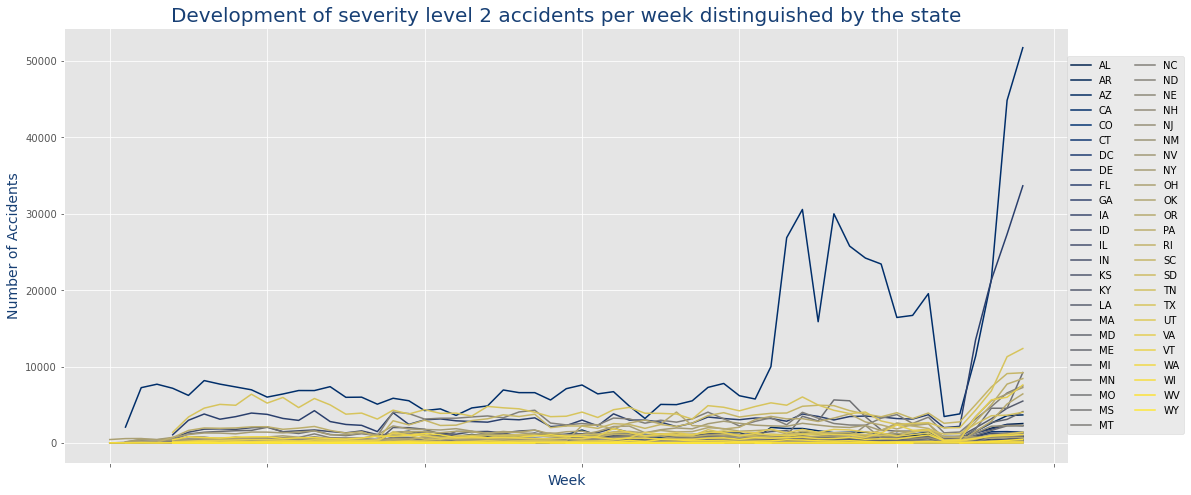

In [67]:
data_prep_sev_2 = data_prep[data_prep.Severity == 2]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 8))

data_prep_sev_2.groupby(['Year', 'Month', 'State']).count()['City'].unstack().plot(ax=ax, cmap="cividis")

ax.set_xlabel('Week', color="#173F74", fontsize=14)
ax.set_ylabel('Number of Accidents', color="#173F74", fontsize=14)
ax.set_title("Development of severity level 2 accidents per week distinguished by the state", fontsize=20,
             color="#173F74")
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.5), ncol=2)
plt.show()

#### 5.5.3 Preparation Part 2

Splitting into first half of 2019 and first half of 2020

In [23]:
# For 2020
data_prep_wo_bias_2020 = data_prep_wo_bias[data_prep_wo_bias.Year == 2020]
data_prep_wo_bias_2020_h1 = data_prep_wo_bias_2020[data_prep_wo_bias_2020.Week <= 26]

# For 2019
data_prep_wo_bias_2019 = data_prep_wo_bias[data_prep_wo_bias.Year == 2019]
data_prep_wo_bias_2019_h1 = data_prep_wo_bias_2019[data_prep_wo_bias_2019.Week <= 26]
# Needed to exclude last days of 2019 who are counted towards the first week of the new year:
data_prep_wo_bias_2019_h1 = data_prep_wo_bias_2019_h1[data_prep_wo_bias_2019_h1.Month <= 6]

#### 5.5.4 Rerun the existing graphs with the reduced data set

Stacked histogram of Hour colored by Severity in 2019 H1

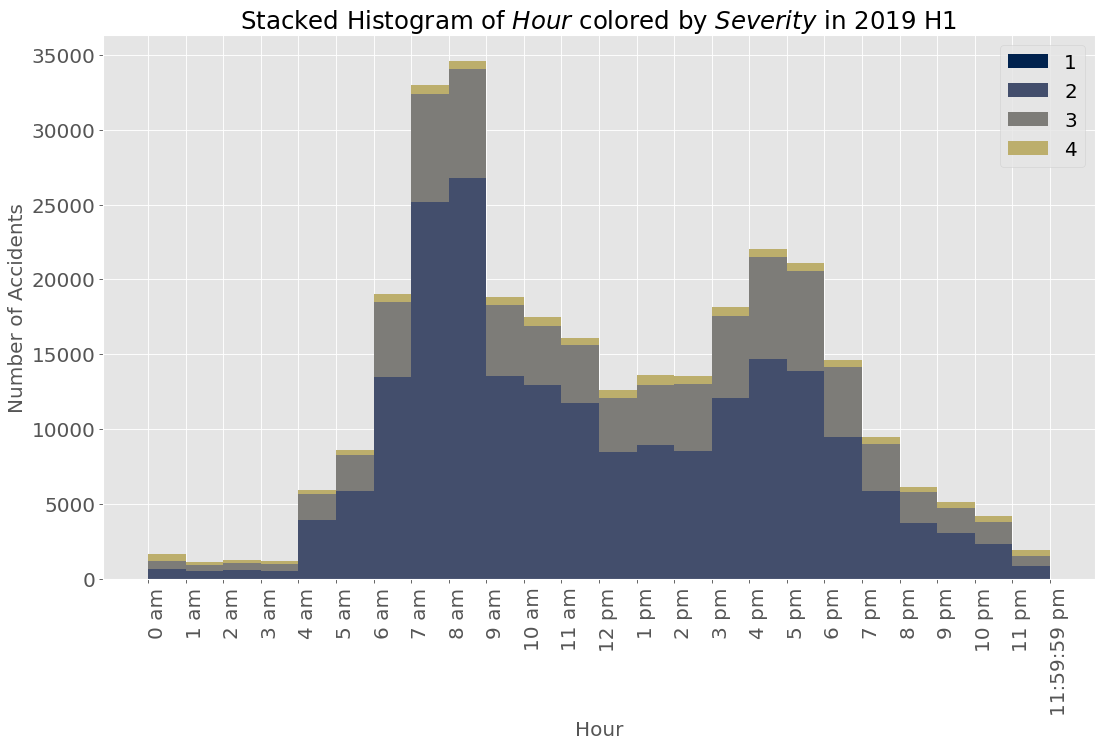

In [68]:
# Prepare data
x_var = 'Hour'
groupby_var = 'Severity'
df_agg = data_prep_wo_bias_2019_h1.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep_wo_bias_2019_h1[x_var].values.tolist() for i, data_prep_wo_bias_2019_h1 in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep_wo_bias_2019_h1[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend(
    {group: col for group, col in zip(np.unique(data_prep_wo_bias_2019_h1[groupby_var]).tolist(), colors[:len(vals)])},
    fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$ in 2019 H1", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
hour_list = ['0 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
             '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm',
             '11:59:59 pm']
plt.xticks(bins, hour_list, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Stacked histogram of Hour colored by Severity in 2020

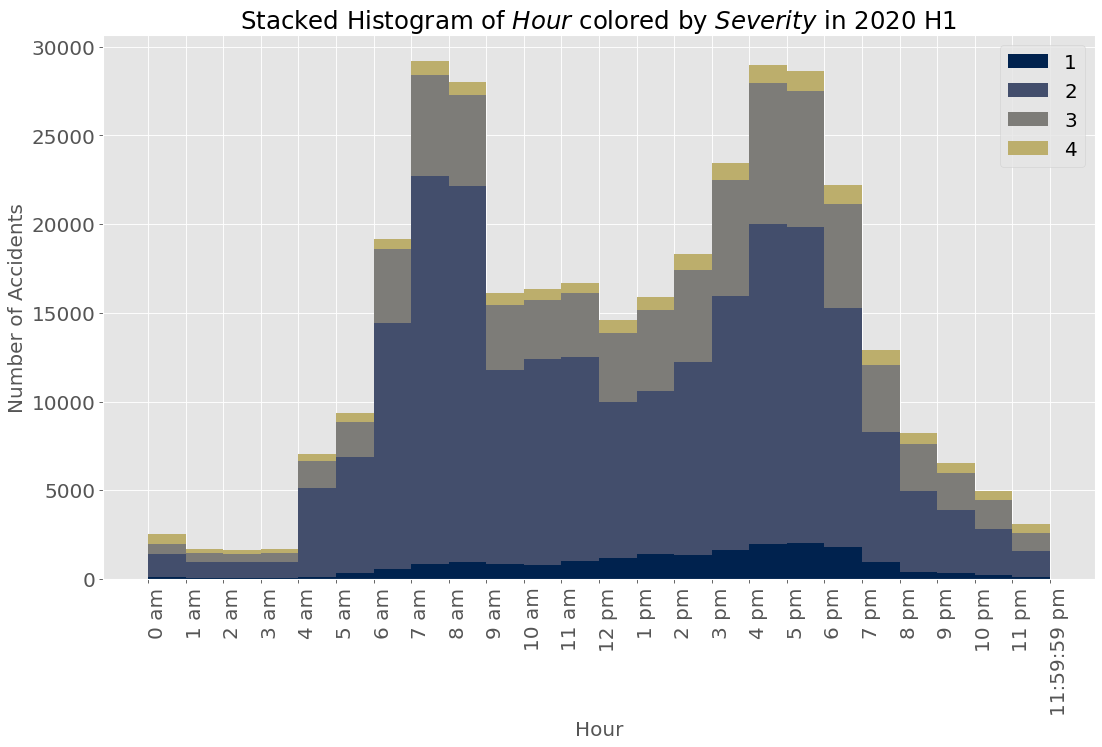

In [69]:
# Prepare data
x_var = 'Hour'
groupby_var = 'Severity'
df_agg = data_prep_wo_bias_2020_h1.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep_wo_bias_2020_h1[x_var].values.tolist() for i, data_prep_wo_bias_2020_h1 in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep_wo_bias_2020_h1[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend(
    {group: col for group, col in zip(np.unique(data_prep_wo_bias_2020_h1[groupby_var]).tolist(), colors[:len(vals)])},
    fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$ in 2020 H1", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
hour_list = ['0 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
             '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm',
             '11:59:59 pm']
plt.xticks(bins, hour_list, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Stacked histogram of Weekday colored by Severity in 2019

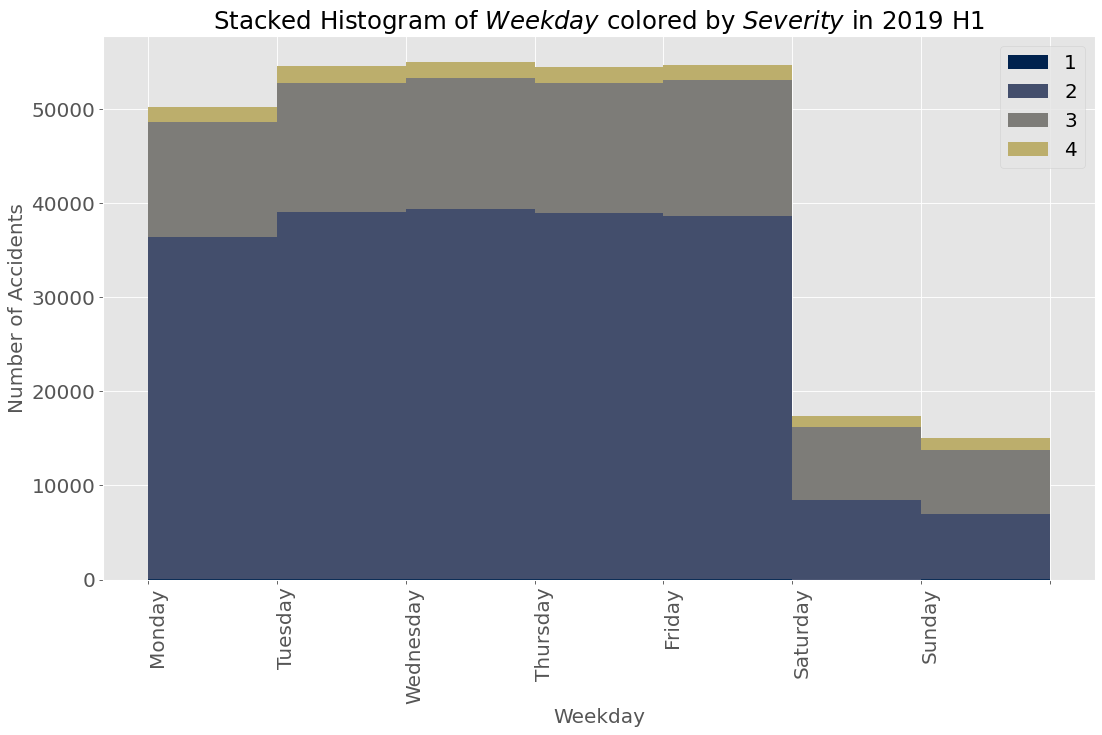

In [70]:
# Prepare data
x_var = 'Weekday'
groupby_var = 'Severity'
df_agg = data_prep_wo_bias_2019_h1.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep_wo_bias_2019_h1[x_var].values.tolist() for i, data_prep_wo_bias_2019_h1 in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep_wo_bias_2019_h1[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend(
    {group: col for group, col in zip(np.unique(data_prep_wo_bias_2019_h1[groupby_var]).tolist(), colors[:len(vals)])},
    fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$ in 2019 H1", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
weekday_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", None]
plt.xticks(bins, weekday_list, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Stacked histogram of Weekday colored by Severity in 2020

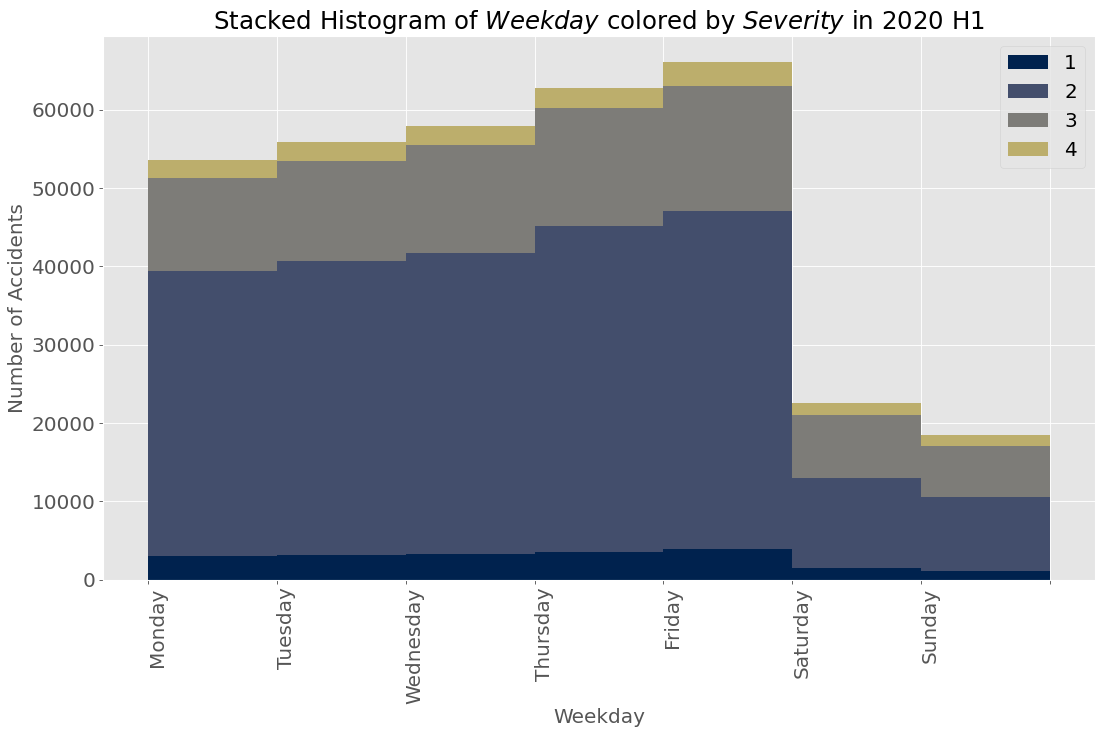

In [71]:
# Prepare data
x_var = 'Weekday'
groupby_var = 'Severity'
df_agg = data_prep_wo_bias_2020_h1.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep_wo_bias_2020_h1[x_var].values.tolist() for i, data_prep_wo_bias_2020_h1 in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep_wo_bias_2020_h1[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend(
    {group: col for group, col in zip(np.unique(data_prep_wo_bias_2020_h1[groupby_var]).tolist(), colors[:len(vals)])},
    fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$ in 2020 H1", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
weekday_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", None]
plt.xticks(bins, weekday_list, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

US map: Scatter plot based on latitude and longitude data for 2019

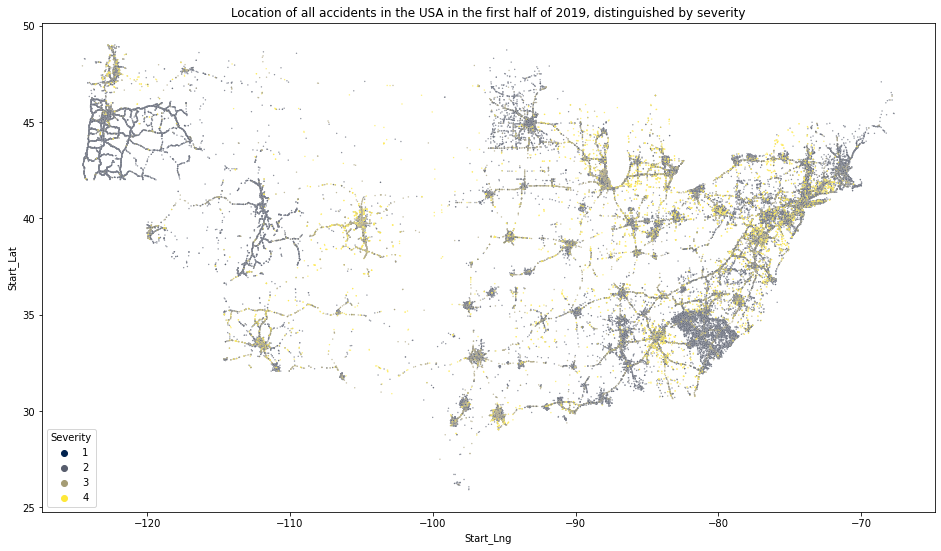

In [24]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x="Start_Lng", y="Start_Lat", data=data_prep_wo_bias_2019_h1, hue="Severity", legend="auto",
                s=2, palette="cividis", alpha=0.7)
plt.title("Location of all accidents in the USA in the first half of 2019, distinguished by severity")
plt.show()

US map: Scatter plot based on latitude and longitude data for 2020

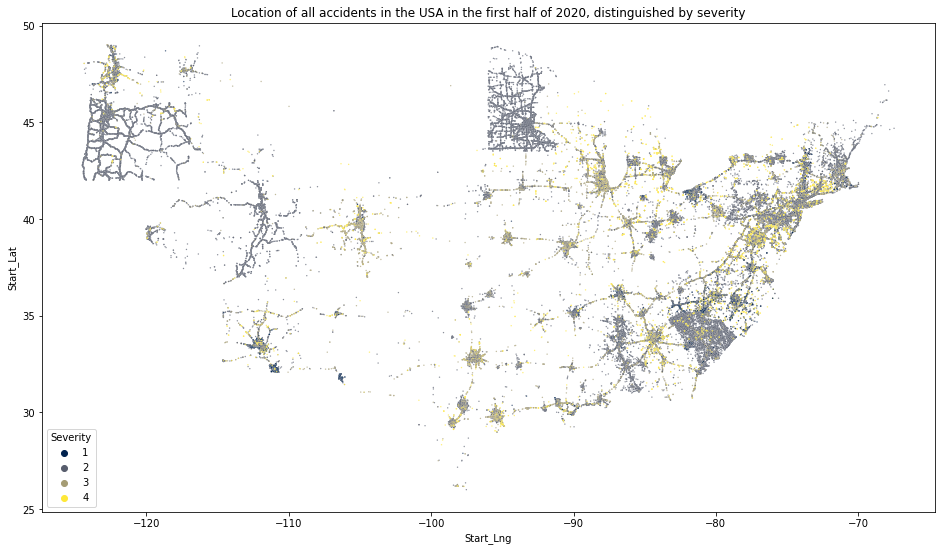

In [25]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x="Start_Lng", y="Start_Lat", data=data_prep_wo_bias_2020_h1, hue="Severity", legend="auto",
                s=2, palette="cividis", alpha=0.7)
plt.title("Location of all accidents in the USA in the first half of 2020, distinguished by severity")
plt.show()

Stacked histogram of Week colored by Severity in 2019

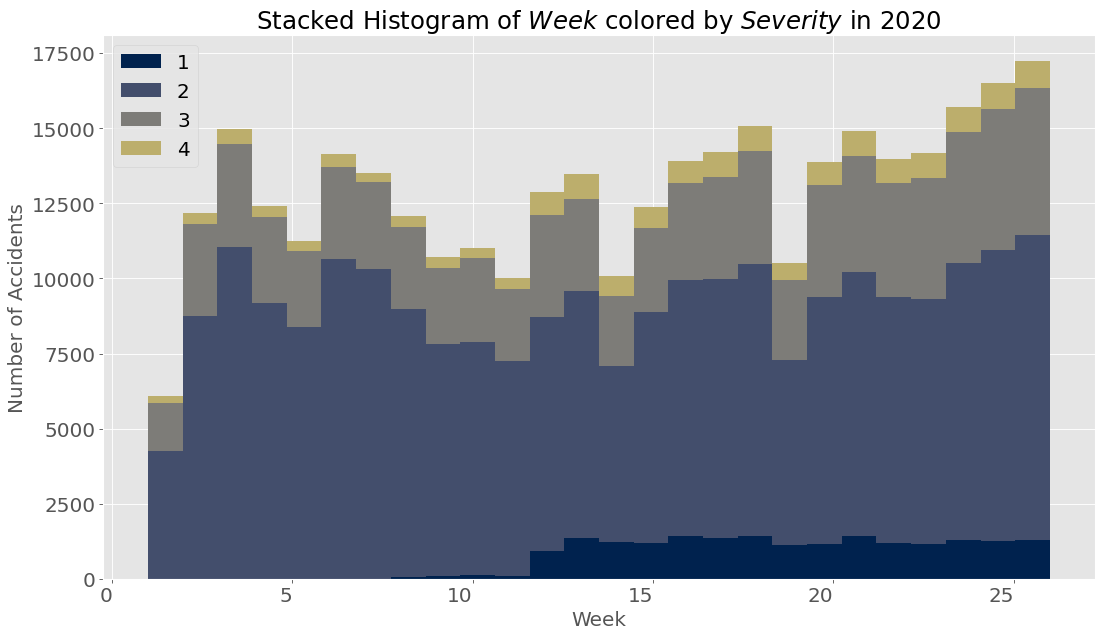

In [72]:
# Prepare data
x_var = 'Week'
groupby_var = 'Severity'
df_agg = data_prep_wo_bias_2020_h1.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep_wo_bias_2020_h1[x_var].values.tolist() for i, data_prep_wo_bias_2020_h1 in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep_wo_bias_2020_h1[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend(
    {group: col for group, col in zip(np.unique(data_prep_wo_bias_2020_h1[groupby_var]).tolist(), colors[:len(vals)])},
    fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$ in 2020", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
# plt.ylim(0, 40)
#week_list = list(range(bins))
plt.xticks(rotation=0, horizontalalignment='right', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Stacked histogram of Week colored by Severity in 2020

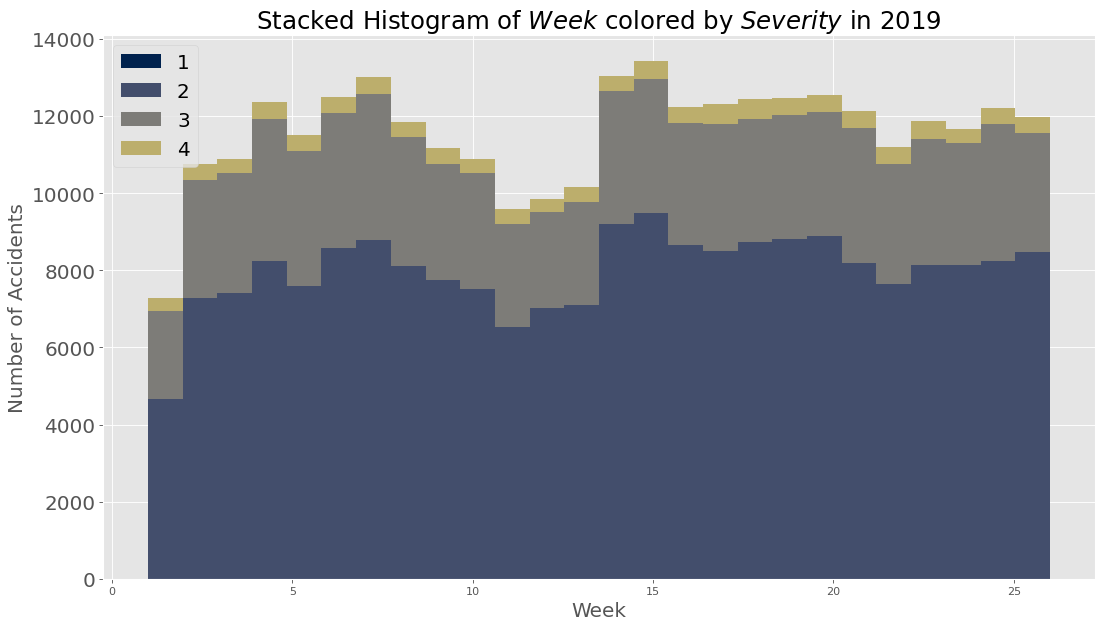

In [73]:
# Prepare data
x_var = 'Week'
groupby_var = 'Severity'
df_agg = data_prep_wo_bias_2019_h1.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data_prep_wo_bias_2019_h1[x_var].values.tolist() for i, data_prep_wo_bias_2019_h1 in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.cividis(i / float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data_prep_wo_bias_2019_h1[x_var].unique().__len__(), stacked=True, density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend(
    {group: col for group, col in zip(np.unique(data_prep_wo_bias_2019_h1[groupby_var]).tolist(), colors[:len(vals)])},
    fontsize=18)
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$ in 2019", fontsize=22)
plt.xlabel(x_var, fontsize=18)
plt.ylabel("Number of Accidents", fontsize=18)
# plt.ylim(0, 40)
#month_list = ['January', 'February', 'March', 'April', 'May', 'June', None]
#plt.xticks(bins, month_list, rotation=90, horizontalalignment='left', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Graph of number of accidents per state to show sharp increase

/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


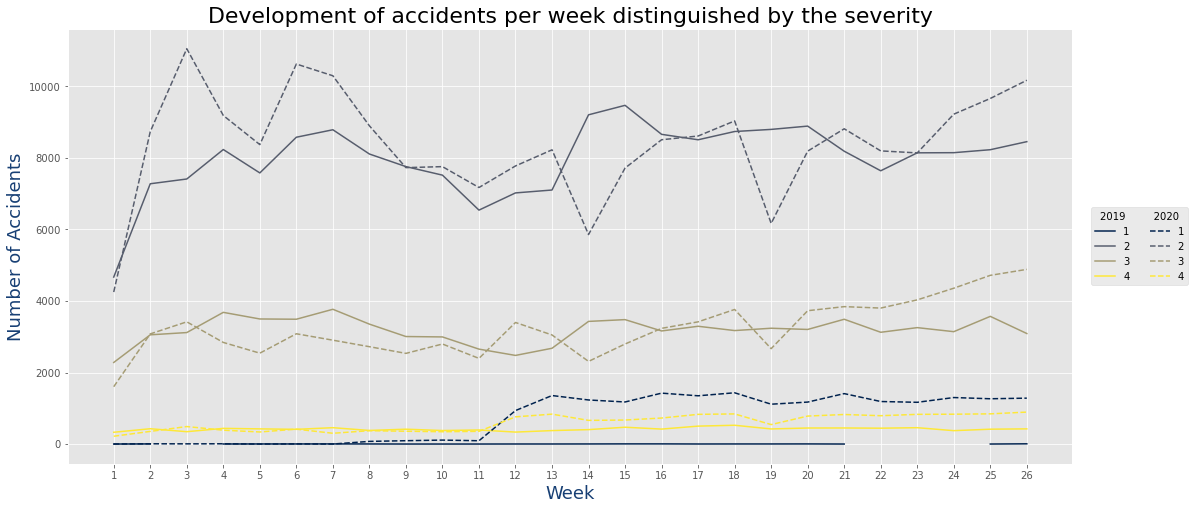

In [74]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 8))
data_prep_wo_bias_2019_h1.groupby(['Year', 'Week', 'Severity']).count()['City'].unstack().plot(ax=ax, cmap="cividis")
data_prep_wo_bias_2020_h1.groupby(['Year', 'Week', 'Severity']).count()['City'].unstack().plot(ax=ax, cmap="cividis",
                                                                                               linestyle="dashed")
week_list = list(range(26))
week_list_ = list(range(1, 27, 1))
ax.set_xticks(week_list)
ax.set_xticklabels(week_list_)
ax.set_xlabel('Week', color="#173F74", fontsize=18)
ax.set_ylabel('Number of Accidents', color="#173F74", fontsize=18)
ax.set_title("Development of accidents per week distinguished by the severity", fontsize=22)
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.5), ncol=2, title="2019         2020")
plt.show()

Reasons for increase in data according to the author:

The sharp jump in # of accidents is mostly related to one of the sources that provided accident data,
which suddenly provided way more data than it used to provide in the past.
Why does this happen? The traffic accident providers usually work with many agencies to get this data on a real-time basis, and at some point they might get the data from more or less sources, which could result in increase/decrease in # of accidents


---
## 6 Feature Engineering

In [26]:
# Preparation
data_encoding = data_prep_wo_bias.copy(deep=True)

# Only data 01.01.2017 - 30.06.2020
data_encoding = data_encoding[data_encoding['Year'] >= 2017]
data_encoding = data_encoding[(data_encoding['Year'] != 2020) | (data_encoding['Month'] < 7)]
# Drop severity 1
data_encoding = data_encoding[data_encoding['Severity'] != 1]

# Reset index
data_encoding.reset_index(inplace=True, drop=True)
data_encoding.head()

,TMC,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,...,Distance(km),Temperature(C),Wind_Speed(kmh),Visibility(km),Pressure(Pa),Year,Month,Week,Weekday,Hour
0,201.0,2,2017-01-02 14:19:23,33.399803,-84.807594,Roscoe Rd,R,Newnan,Coweta,GA,...,0.01609,14.500000,16.7336,11.2630,1.005682,2017,1,1,0,14
1,201.0,3,2017-01-02 13:44:38,34.174515,-84.758995,I-75 N,R,Cartersville,Bartow,GA,...,0.01609,12.777778,7.4014,4.8270,1.006350,2017,1,1,0,13
2,201.0,3,2017-01-02 14:10:42,33.652431,-84.396278,Porsche Ave,R,Atlanta,Fulton,GA,...,0.01609,13.277778,13.0329,0.3218,1.006350,2017,1,1,0,14
3,201.0,3,2017-01-02 13:57:42,33.744976,-84.390343,I-75 S,R,Atlanta,Fulton,GA,...,0.01609,13.277778,13.0329,0.3218,1.006350,2017,1,1,0,13
4,201.0,3,2017-01-02 14:09:31,33.928226,-84.176018,Indian Trail Lilburn Rd,R,Norcross,Gwinnett,GA,...,0.01609,11.722222,11.1021,0.8045,1.007019,2017,1,1,0,14


In [27]:
data_encoding['Severity'].value_counts()

2    1292638
3     548615
4      70363
Name: Severity, dtype: int64

### 6.1 Type Conversion

#### 6.1.1 Ordinal Encoding

Ordinal encoding for streets and cities

In [28]:
# Ordinal encoding instead of frequency encoding -> frequency encoding takes too long on current device
ordinal_encoder = OrdinalEncoder()

data_encoding[['Street']] = ordinal_encoder.fit_transform(data_encoding[['Street']])
print(ordinal_encoder.categories_)

data_encoding[['City']] = ordinal_encoder.fit_transform(data_encoding[['City']])
print(ordinal_encoder.categories_)

[array([' 1 Mile Rd', ' 1/2 Mile Rd', ' 10 Mile Rd NE', ..., 'Zurich Ct',
       'Zurich Dr', 'Zuzu Dr'], dtype=object)]
[array(['Aaronsburg', 'Abbeville', 'Abbotsford', ..., 'Zumbrota', 'Zuni',
       'Zwingle'], dtype=object)]


#### 6.1.2 'Binary' Encoding
Ordinal encoding for Nautical_Twilight with Day/Night values to bool
Ordinal encoding for Side (Left/Right) to bool
Ordinal encoding for POI columns (True/False) to bool

In [29]:
# L - 0, R - 1
data_encoding[['Side']] = ordinal_encoder.fit_transform(data_encoding[['Side']])
print(ordinal_encoder.categories_)

[array(['L', 'R'], dtype=object)]


In [30]:
# Day - 0, Night 1
data_encoding[['Nautical_Twilight']] = ordinal_encoder.fit_transform(data_encoding[['Nautical_Twilight']])
print(ordinal_encoder.categories_)

[array(['Day', 'Night'], dtype=object)]


In [31]:
for column in bool_columns:
    data_encoding[[column]] = ordinal_encoder.fit_transform(data_encoding[[column]])
    print(ordinal_encoder.categories_)

[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]
[array([False,  True])]


#### 6.1.3 OneHot Encoding

For states and wind direction

In [32]:
# Initialize encoder
ohc = OneHotEncoder()

For States

In [33]:
one_hot_encoded = ohc.fit_transform(data_encoding.State.values.reshape(-1, 1)).toarray()

# Generate array with correct column names
categories = ohc.categories_
column_names = []

for category in categories[0]:
    column_name = category
    column_names.append(column_name)

# Set correct column names
one_hot_data = pd.DataFrame(one_hot_encoded, columns=column_names)

In [34]:
# Delete one column to avoid the dummy variable trap
one_hot_data.drop(one_hot_data.columns[-1], axis=1, inplace=True)

# Combining ohc dataframe to previous df
data_encoding = pd.concat([data_encoding, one_hot_data], axis=1)

# Removing original column
data_encoding.drop('State', axis=1, inplace=True)
data_encoding.head()

,TMC,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,Zipcode,...,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV
0,201.0,2,2017-01-02 14:19:23,33.399803,-84.807594,95832.0,1.0,6311.0,Coweta,30263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201.0,3,2017-01-02 13:44:38,34.174515,-84.758995,63704.0,1.0,1341.0,Bartow,30121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,201.0,3,2017-01-02 14:10:42,33.652431,-84.396278,91776.0,1.0,334.0,Fulton,30354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201.0,3,2017-01-02 13:57:42,33.744976,-84.390343,63705.0,1.0,334.0,Fulton,30312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201.0,3,2017-01-02 14:09:31,33.928226,-84.176018,64124.0,1.0,6359.0,Gwinnett,30093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For Wind Direction

In [35]:
one_hot_encoded = ohc.fit_transform(data_encoding.Wind_Direction.values.reshape(-1, 1)).toarray()

# Generate array with correct column names
categories = ohc.categories_
column_names = []

for category in categories[0]:
    column_name = category
    column_names.append(column_name)

# Set correct column names
one_hot_data = pd.DataFrame(one_hot_encoded, columns=column_names)
one_hot_data.head()

,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Delete one column to avoid the dummy variable trap
one_hot_data.drop(one_hot_data.columns[-1], axis=1, inplace=True)

# Combining ohc dataframe to previous df
data_encoding = pd.concat([data_encoding, one_hot_data], axis=1)

# Removing original column
data_encoding.drop('Wind_Direction', axis=1, inplace=True)
data_encoding.head()

,TMC,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,Zipcode,...,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW
0,201.0,2,2017-01-02 14:19:23,33.399803,-84.807594,95832.0,1.0,6311.0,Coweta,30263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201.0,3,2017-01-02 13:44:38,34.174515,-84.758995,63704.0,1.0,1341.0,Bartow,30121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,201.0,3,2017-01-02 14:10:42,33.652431,-84.396278,91776.0,1.0,334.0,Fulton,30354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201.0,3,2017-01-02 13:57:42,33.744976,-84.390343,63705.0,1.0,334.0,Fulton,30312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201.0,3,2017-01-02 14:09:31,33.928226,-84.176018,64124.0,1.0,6359.0,Gwinnett,30093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 6.1.4 Manual Encoding
For Weather Condition

In [37]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder()

data_one_hot = one_hot_encoder.fit_transform(data_encoding[['Weather_Condition']])
data_one_hot_array = data_one_hot.toarray()

# Generate array with correct column names
categories = one_hot_encoder.categories_
column_names = []

for category in categories[0]:
    column_name = category
    column_names.append(column_name)

# Set correct column names
data_one_hot = pd.DataFrame(data_one_hot_array, columns=column_names)

# Delete one column to avoid the dummy variable trap
data_one_hot.drop(data_one_hot.columns[-1], axis=1, inplace=True)  # drop last n rows
data_one_hot.head()

,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drizzle,Drizzle / Windy,...,Thunder / Windy,Thunder / Wintry Mix / Windy,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Widespread Dust,Wintry Mix
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Concatenate OneHot columns according to weather_value dict
split_words = ['/', 'and', 'with', ' ']


def replace(value, split_value, split_index):
    if split_value in weather_values:
        column_name = 'weather_' + weather_values[split_value]
        if not column_name in data_encoding:
            data_encoding[column_name] = data_one_hot[value]
        else:
            data_encoding[column_name] += data_one_hot[value]

    else:
        try:
            if split_index < len(split_words):
                split_values = split_value.split(split_words[split_index])
                for split_value in split_values:
                    split_value = split_value.strip()
                    # Recursively call function
                    replace(value, split_value, split_index + 1)
            else:
                print(split_value)
        except AttributeError or TypeError:
            print(str(value) + "!")

# Call replace for each OneHot column
for column in data_one_hot:
    replace(column, column, 0)

data_encoding.drop('Weather_Condition', axis=1, inplace=True)

Pellets
Shower
Showers
Pellets
Pellets
Shower
Shower
Showers
Grains
Shower
Showers
Shower
Showers
Nearby
Showers


note: the above section could have been done using a dictionary showing the values to replace the not dictionary
for example:
{
    'mostly cloudy': 'cloudy',
    'overcast': 'cloudy,
    'scattered clouds' : 'cloudy'
}
and so on.
However, we could not proceed with this because it would have taken too long on our computers to run the code.
Doing this on the cloud would fix this problem.

#### 6.1.5 Frequency encoding
For County

In [39]:
# Frequency dict
county_dict = data_encoding['County'].value_counts().to_dict()

In [40]:
# Ordinal Freq Encoding
county_array = county_dict.keys()  # Keys from the dict are now arranged in descending order in the array. Most frequent -> least

# Ordinal Encoding according to frequency hierarchy
county_encoder = OrdinalEncoder(categories=county_array)
data_encoding[['County']] = ordinal_encoder.fit_transform(data_encoding[['County']])

### 6.2 Timestamp transformation (Unix)
Converting Start_Time to seconds from Unix Epoch.

In [41]:
d = data_encoding['Start_Time']
# Converting to unix epoch time and adding to df
data_encoding['N_Start_Time'] = d.view('int64')

# Dropping original Start_Time column
data_encoding.drop('Start_Time', axis=1, inplace=True)

### 6.3 Normalization

In [42]:
data_final = data_encoding.copy(deep=True)

# Divide columns into dependant and independent
data_independent = data_final.drop(['Severity'], axis=1)
data_dependant = data_final[['Severity']]

data_independent.head()

,TMC,Start_Lat,Start_Lng,Street,Side,City,County,Zipcode,Humidity(%),Amenity,...,weather_Partial,weather_Sand,weather_Whirls,weather_Whirlwinds,weather_Smoke,weather_Snow Grains,weather_Squalls,weather_Wintry Mix,weather_Tornado,N_Start_Time
0,201.0,33.399803,-84.807594,95832.0,1.0,6311.0,354.0,30263,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1483366763000000000
1,201.0,34.174515,-84.758995,63704.0,1.0,1341.0,92.0,30121,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1483364678000000000
2,201.0,33.652431,-84.396278,91776.0,1.0,334.0,536.0,30354,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1483366242000000000
3,201.0,33.744976,-84.390343,63705.0,1.0,334.0,536.0,30312,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1483365462000000000
4,201.0,33.928226,-84.176018,64124.0,1.0,6359.0,620.0,30093,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1483366171000000000


In [43]:
# Scale each column so that every feature/parameter has equal weight

x = data_independent.values  # returns a numpy array with all the values of the dataframe
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

data_independent = pd.DataFrame(x_scaled, index=data_independent.index, columns=data_independent.columns)
data_independent.head()

,TMC,Start_Lat,Start_Lng,Street,Side,City,County,Zipcode,Humidity(%),Amenity,...,weather_Partial,weather_Sand,weather_Whirls,weather_Whirlwinds,weather_Smoke,weather_Snow Grains,weather_Squalls,weather_Wintry Mix,weather_Tornado,N_Start_Time
0,0.495074,0.324103,0.692328,0.762120,1.0,0.626278,0.220561,0.297372,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001250
1,0.495074,0.357664,0.693173,0.506617,1.0,0.133075,0.057321,0.295929,0.959596,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001231
2,0.495074,0.335047,0.699480,0.729864,1.0,0.033145,0.333956,0.298297,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001245
3,0.495074,0.339056,0.699583,0.506625,1.0,0.033145,0.333956,0.297870,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001238
4,0.495074,0.346994,0.703310,0.509957,1.0,0.631041,0.386293,0.295644,0.959596,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001245


---
## 7 Model
### 7.1 Partitioning the Data

In [44]:
# Assign data
X = data_independent
Y = data_dependant

# Generate test and trainings set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

### 7.2 Sampling

Training data

In [45]:
# Concatenate data for sampling
data_tbsampled = X_train.copy(deep=True)
data_tbsampled['severity'] = Y_train

data_tbsampled.reset_index(inplace=True, drop=True)

In [46]:
severity_values = Y_train['Severity'].value_counts()
severity_values

2    1033876
3     439028
4      56388
Name: Severity, dtype: int64

In [47]:
# Ensuring every severity level has equal proportions in the data
def balanced_subsample(y, size=None, random_state=None):  # returns a List with randomly chosen row numbers
    subsample = []
    if size is None:
        n_smp = y.value_counts().min()
    else:
        n_smp = int(size / len(y.value_counts().index))

    if not random_state is None:
        np.random.seed(random_state)

    for label in y.value_counts().index:
        samples = y[y == label].index.values
        index_range = range(samples.shape[0])
        indexes = np.random.choice(index_range, size=n_smp, replace=False)
        subsample += samples[indexes].tolist()

    return subsample

rows = balanced_subsample(data_tbsampled['severity'], size=20000, random_state=0)

In [48]:
# Split data again
data_downsampled = data_tbsampled.iloc[rows, :]

X_train = data_downsampled.drop('severity', axis=1)
Y_train = data_downsampled['severity']

Test Data

In [49]:
# Making sure train Y has the same number of rows

# Concatenate data for sampling
data_test_tbsampled = X_test.copy(deep=True)
data_test_tbsampled['severity'] = Y_test

data_test_tbsampled.reset_index(inplace=True, drop=True)

In [50]:
# Stratified resampling
data_test_sampled = resample(data_test_tbsampled, replace=False, n_samples=2000, random_state=0)

In [51]:
# Split data again
X_test = data_test_sampled.drop('severity', axis=1)
Y_test = data_test_sampled['severity']

### 7.3 Fitting

In [52]:
# Create report df
report = pd.DataFrame(columns=['Model', 'Mean Acc. Training', 'Standard Deviation', 'Acc. Test'])

#### 7.3.1 KNN

In [54]:
knnmodel = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    'n_neighbors': [3, 5, 20],
    'weights': ['distance', 'uniform']
}

# Find best hyperparameters
CV_knnmodel = GridSearchCV(estimator=knnmodel, param_grid=param_grid, cv=10)
CV_knnmodel.fit(X_train, Y_train)
print(CV_knnmodel.best_params_)

# Use the best parameters
knnmodel = knnmodel.set_params(**CV_knnmodel.best_params_)
knnmodel.fit(X_train, Y_train)

{'n_neighbors': 20, 'weights': 'distance'}


KNeighborsClassifier(n_jobs=-1, n_neighbors=20, weights='distance')

In [55]:
# Predict training data
Y_test_pred = knnmodel.predict(X_test)
acctest = accuracy_score(Y_test, Y_test_pred)

In [56]:
# Fill report
report.loc[len(report)] = ['k-NN (grid)',
                           CV_knnmodel.cv_results_['mean_test_score'][CV_knnmodel.best_index_],
                           CV_knnmodel.cv_results_['std_test_score'][CV_knnmodel.best_index_],
                           acctest]
print(report.loc[len(report) - 1])

Model                 k-NN (grid)
Mean Acc. Training       0.616961
Standard Deviation     0.00944114
Acc. Test                   0.574
Name: 0, dtype: object


In [57]:
# Visualize confusion matrix

cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

Confusion Matrix Testing:
 [[727 498 158]
 [ 99 378  73]
 [  6  18  43]]


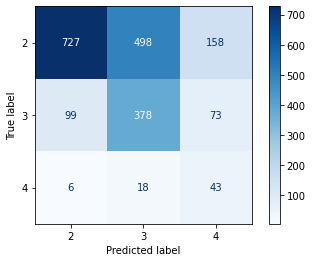

In [58]:
plot_confusion_matrix(knnmodel, X_test, Y_test, labels=[2, 3, 4],
                      cmap=plt.cm.Blues, values_format='d')

#### 7.3.2 Decision Trees

In [59]:
dtree_model = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 6, 7, 8]  # why not more? -> it is suggested that the best number of splits lie between 5-8
}

# Find best hyperparameters
CV_dtree_model = GridSearchCV(estimator=dtree_model, param_grid=param_grid, cv=10)
CV_dtree_model.fit(X_train, Y_train)
print(CV_dtree_model.best_params_)

# Use the best parameters
dtree_model = dtree_model.set_params(**CV_dtree_model.best_params_)
dtree_model.fit(X_train, Y_train)

{'max_depth': 8, 'n_estimators': 150}


RandomForestClassifier(max_depth=8, n_estimators=150, n_jobs=-1)

In [60]:
# Predict test data
Y_test_pred = dtree_model.predict(X_test)
acctest = accuracy_score(Y_test, Y_test_pred)

In [61]:
# Fill report
report.loc[len(report)] = ['Random Forest Classifier (grid)',
                           CV_dtree_model.cv_results_['mean_test_score'][CV_dtree_model.best_index_],
                           CV_dtree_model.cv_results_['std_test_score'][CV_dtree_model.best_index_],
                           acctest]
print(report.loc[len(report) - 1])

Model                 Random Forest Classifier (grid)
Mean Acc. Training                           0.740074
Standard Deviation                         0.00783414
Acc. Test                                        0.63
Name: 1, dtype: object


In [62]:
# Visualize confusion matrix

cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

Confusion Matrix Testing:
 [[787 372 224]
 [ 61 413  76]
 [  3   4  60]]


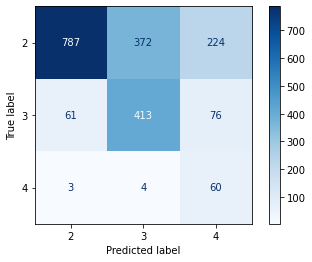

In [63]:
plot_confusion_matrix(dtree_model, X_test, Y_test, labels=[2, 3, 4], cmap=plt.cm.Blues, values_format='d')

#### 7.3.3 Neural Networks

In [ ]:
nnetmodel = MLPClassifier(max_iter=400)

param_grid = {
    'hidden_layer_sizes': [(5,), (100, 50)],
    'activation': ['logistic', 'relu']
}

# Find best hyperparameters
CV_nnetmodel = GridSearchCV(estimator=nnetmodel, param_grid=param_grid, cv=10)
CV_nnetmodel.fit(X_train, Y_train)
print(CV_nnetmodel.best_params_)

# Use the best parameters
nnetmodel = nnetmodel.set_params(**CV_nnetmodel.best_params_)
nnetmodel.fit(X_train, Y_train)

/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/jasmincapka/opt/anaconda3/envs/DataAnalytics/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.p

In [ ]:
Y_test_pred = nnetmodel.predict(X_test)
acctest = accuracy_score(Y_test, Y_test_pred)

In [ ]:
# Fill report
report.loc[len(report)] = ['Neural Networks (grid)',
                           CV_nnetmodel.cv_results_['mean_test_score'][CV_nnetmodel.best_index_],
                           CV_nnetmodel.cv_results_['std_test_score'][CV_nnetmodel.best_index_],
                           acctest]
print(report.loc[len(report) - 1])

In [ ]:
# Visualize confusion matrix
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

In [ ]:
plot_confusion_matrix(nnetmodel, X_test, Y_test, labels=[2, 3, 4],
                      cmap=plt.cm.Blues, values_format='d')
